+-------+-------+
|Ratings|  Count|
+-------+-------+
|    0.5|  94988|
|    1.0| 384180|
|    1.5| 118278|
|    2.0| 790306|
|    2.5| 370178|
|    3.0|2356676|
|    3.5| 879764|
|    4.0|2875850|
|    4.5| 585022|
|    5.0|1544812|
+-------+-------+



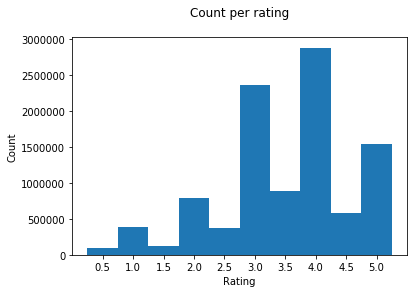

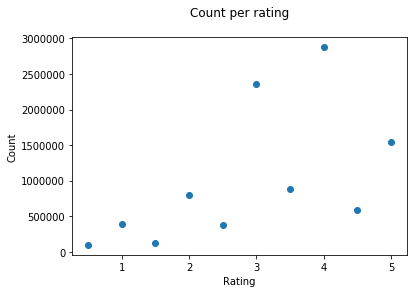

In [1]:
import findspark
findspark.init()

import pyspark
import sys
import re
import random
import pandas as pd
import matplotlib


from pyspark import SparkConf, SparkContext
%matplotlib inline
import matplotlib.pyplot as plt
import re

from pyspark.sql import SQLContext
from pyspark import sql

sc=SparkContext(appName = "MovieRatingGraph2")
lines = sc.textFile("/data/movie-ratings/ratings.dat")
data = lines.map(lambda x: re.split(r'::', x)) 
ratings = data.map(lambda x:float(x[2]))
users =ratings.map(lambda x: (x,1)) 
users_grouped = users.reduceByKey(lambda a,b: (a+b)) 

datasorted=users_grouped.sortByKey(ascending=True)

usersgroupedX=datasorted.map(lambda x:(x[0]))
usersgroupedY=datasorted.map(lambda x:(x[1]))




sqlContext = sql.SQLContext(sc)
df = sqlContext.createDataFrame(datasorted, ["Ratings","Count"] )
df.show()

width =0.5


plt.bar(usersgroupedX.take(usersgroupedX.count()), usersgroupedY.take(usersgroupedY.count()), width=width)

#plt.style.use('ggplot')

#df.plot.bar();

#ax=df[['Ratings','Count']].plot( kind='bar')
#plt.title("Count per rating\n")
#plt.xlabel("Rating")
#plt.ylabel("Count")
#plt.hist(rdd_data.take(rdd_data.count()), align='mid', rwidth=0.9, bins=10)

#configure  X axes
plt.xlim(0,5.5)
plt.xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.title("Count per rating\n")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.show()


plt.title("Count per rating\n")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.scatter(usersgroupedX.take(ratings.count()), usersgroupedY.take(ratings.count()))
plt.show()

sc.stop()

# plt.barh(datay.take(5), width=5, align='center', alpha=0.4)
# plt.show()
# # plt.barh(datay, datax, width=0.35, color='#d62728').plot


#plt.bar(datax, datay, align='center')
#plt.xlabel('Rating')
#ply.ylabel('Frequency')
#plt.show()